# Installing Dependencies

In [2]:
 import os
 import numpy as np
 import h5py
 import matplotlib.pyplot as plt
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras.layers import Flatten
 from tensorflow.keras.layers import Dense
 from tensorflow.keras.losses import SparseCategoricalCrossentropy
 from sklearn.metrics import accuracy_score
 from sys import getsizeof


In [3]:
print(tf.__version__)

2.18.0


# Define helper functions

In [4]:
def get_file_size(file_path):
  size = os.path.getsize(file_path)
  return size

In [5]:
def convert_bytes(size, unit = None):
  if unit == "KB":
    return print ('File size: ' + str(round(size / 1024, 3)) + 'Kilobytes')
  elif unit =="MB":
    return print("File size: " + str(round(size/(1024 * 1024), 3)) + 'Megabytes')
  else:
    return print('File size: ' + str(size) + 'bytes')


# Import the Fashion MNIST dataset


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal' 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the Data

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
len(train_labels)

60000

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

In [14]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Pre-processing

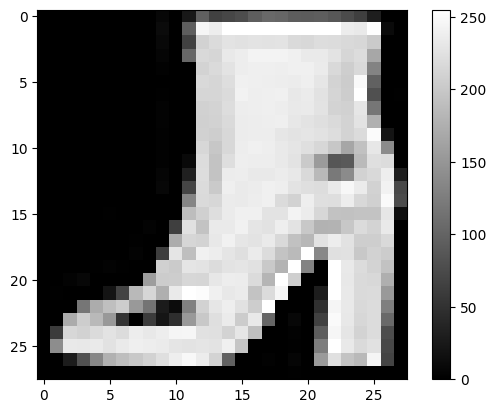

In [15]:
plt.figure()
plt.imshow(train_images[88], cmap = 'gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
train_images = train_images / 255.0;
test_images = test_images / 255.0;

# Build & Compile Model

In [17]:
model = keras.Sequential([
         Flatten(input_shape = (28,28)),
         Dense(128, activation = 'relu'),
         Dense(10)
                          ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer= 'adam',
              loss = SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [22]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7805 - loss: 0.6297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8642 - loss: 0.3774
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8789 - loss: 0.3361
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3133
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8881 - loss: 0.2963
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8985 - loss: 0.2767
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9048 - loss: 0.2598
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9053 - loss: 0.2503
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9109 - loss: 0.2431
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9147 - loss: 0.2309


In [23]:
KERAS_MODEL_NAME = 'tf_model_fashion_mnist.h5'

In [24]:
model.save(KERAS_MODEL_NAME)

In [25]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), 'MB')

File size: 1.187Megabytes


In [26]:
keras_model_size = get_file_size(KERAS_MODEL_NAME)

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy is {}%'.format(round(100 * test_acc, 2)))

313/313 - 1s - 2ms/step - accuracy: 0.8837 - loss: 0.3413

Test accuracy is 88.37%


# TF LITE Model

In [35]:
TF_LITE_MODEL_FILE_NAME = 'tf_lite_model.tflite'

In [36]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

Saved artifact at '/tmp/tmpfbnv58ww'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138515396950928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515335433104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515396951696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515335433488: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [39]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, 'wb').write(tflite_model)

408812

In [40]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), 'KB')

File size: 399.23Kilobytes


# Check Input Tensor Shape

In [41]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input Shape:', input_details[0]['shape'])
print('Input Type:', input_details[0]['dtype'])
print('Output Shape:', output_details[0]['shape'])
print('Output Type:', output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


# Resize Tensor Shape

In [42]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input Shape:', input_details[0]['shape'])
print('Input Type:', input_details[0]['dtype'])
print('Output Shape:', output_details[0]['shape'])
print('Output Type:', output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [43]:
test_images.dtype

dtype('float64')

In [44]:
test_images_numpy  = np.array(test_images, dtype = np.float32)

In [45]:
test_images_numpy.dtype

dtype('float32')

In [46]:
interpreter.set_tensor(input_details[0]['index'], test_images_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print('Prediction results shape:', tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis = 1)

Prediction results shape: (10000, 10)


In [48]:
acc = accuracy_score(prediction_classes, test_labels)

In [49]:
print('Test accuracy of the TFLite model is {}%'.format(round(100*acc, 2)))

Test accuracy of the TFLite model is 88.37%


In [52]:
get_file_size(TF_LITE_MODEL_FILE_NAME)/keras_model_size

0.3285044806438756

# TF Lite Model Float 16

In [53]:
TF_LITE_MODEL_FLOAT_16_FILE_NAME = 'tf_lite_float_16_model.tflite'

In [54]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

Saved artifact at '/tmp/tmp920thiga'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138515396950928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515335433104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515396951696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515335433488: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [55]:
tflite_model_name = TF_LITE_MODEL_FLOAT_16_FILE_NAME
open(tflite_model_name, 'wb').write(tflite_model)

205808

In [56]:
convert_bytes(get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME), 'KB')

File size: 200.984Kilobytes


In [57]:
get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)/ keras_model_size

0.1653788297612466

# TF Lite Size Quantized

In [58]:
TF_LITE_SIZE_QUANT_MODEL_FILE_NAME = 'tf_lite_quant_model.tflite'

In [59]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = tf_lite_converter.convert()

Saved artifact at '/tmp/tmpkvvl09li'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138515396950928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515335433104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515396951696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138515335433488: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [60]:
tflite_model_name = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME
open(tflite_model_name, 'wb').write(tflite_model)

105672

In [61]:
convert_bytes(get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME), 'KB')

File size: 103.195Kilobytes


In [62]:
get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)/ keras_model_size

0.08491366564239705

In [63]:
get_file_size(TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)/ get_file_size(TF_LITE_MODEL_FLOAT_16_FILE_NAME)

0.5134494285936406

# Accuracy of the Quantized Model

In [64]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_SIZE_QUANT_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input Shape:', input_details[0]['shape'])
print('Input Type:', input_details[0]['dtype'])
print('Output Shape:', output_details[0]['shape'])
print('Output Type:', output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


In [65]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print('Input Shape:', input_details[0]['shape'])
print('Input Type:', input_details[0]['dtype'])
print('Output Shape:', output_details[0]['shape'])
print('Output Type:', output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [66]:
test_images.dtype

dtype('float64')

In [67]:
test_images_numpy  = np.array(test_images, dtype = np.float32)

In [68]:
interpreter.set_tensor(input_details[0]['index'], test_images_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print('Prediction results shape:', tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis = 1)

Prediction results shape: (10000, 10)


In [69]:
acc = accuracy_score(prediction_classes, test_labels)

In [70]:
print('Test accuracy of the TFLite Quantized model is {}%'.format(round(100*acc, 2)))

Test accuracy of the TFLite Quantized model is 88.39%
